In [1]:
import pandas as pd
import re

# 读取两个Excel文件的数据并合并
df = pd.read_excel(".\\boss\\joblist_1.xlsx")
dfnew = pd.read_excel(".\\boss\\joblist_2.xlsx")
df = pd.concat([df,dfnew],ignore_index=True)
df = df.drop_duplicates()  # 移除重复记录

# 解析薪资字符串，提取平均月薪（单位：K）
def clean_salary(salary_str):
    if pd.isna(salary_str):
        return None
    
    # 匹配"10-15K"格式的薪资
    match_k = re.search(r'(\d+)-(\d+)[Kk]', str(salary_str))
    if match_k:
        low = float(match_k.group(1))
        high = float(match_k.group(2))
        return (low + high) / 2
    
    # 匹配"100-150元/天"格式的薪资，转换为月薪
    match_day = re.search(r'(\d+)-(\d+)元/天', str(salary_str))
    if match_day:
        low = float(match_day.group(1))
        high = float(match_day.group(2))
        return ((low + high) / 2 * 21.75) / 1000  # 按每月21.75工作天计算
        
    return None

df['avg_salary'] = df['薪资'].apply(clean_salary)
df = df.dropna(subset=['avg_salary'])  # 移除薪资为空的记录

# 学历等级映射表
edu_map = {
    '学历不限': 0,
    '高中': 1,
    '中专/中技': 1,
    '大专': 2,
    '本科': 3,
    '硕士': 4,
    '博士': 5
}
df['edu_level'] = df['学历'].map(edu_map).fillna(0)

# 工作经验等级映射表
exp_map = {
    '经验不限': 0,
    '在校/应届': 0,
    '1年以内': 0.5,
    '1-3年': 2,
    '3-5年': 4,
    '5-10年': 7.5,
    '10年以上': 12
}
df['exp_level'] = df['经验'].map(exp_map).fillna(0)


In [2]:
df

,职位,公司,薪资,地区,经验,学历,公司规模,行业,福利标签,技能标签,职位描述,job_id,avg_salary,edu_level,exp_level
0,实习生（25届+金融学优先）,江苏天鼎,6-8K,南京,经验不限,大专,500-999人,互联网金融,"零食下午茶,加班补助,团建聚餐,节日福利,生日福利,员工旅游,年终奖,股票期权,带薪年假,五险一金",金融/证券,任职资格：1、接受应届无经验，在校有过学生干部或兼职经历者优先；2、有意向在公司学习考取证券...,NaN,7.0,2.0,0.0
1,学科编辑（金融学、经济学方向）,智慧树,9-14K,上海,1-3年,本科,1000-9999人,互联网,"带薪年假,交通补助,节日福利,五险一金,补充医疗保险","线上教育,大学/大专生,成人/通用,留学生,学科应试,职业与技能培训,有教研经验,有教育工作...",岗位职责：1、根据平台课程资源，归纳知识点，提炼知识内容，构建高质量的课程知识图谱；2、在知...,NaN,11.5,3.0,2.0
2,诚聘金融业储备管理+ 快速晋升+高薪2w+！,小企助力,12-16K,济南,经验不限,学历不限,1000-9999人,投资/融资,"节日福利,生日福利,零食下午茶,绩效奖金,工龄奖,意外险,通讯补贴,带薪年假,全勤奖,补充医...","企业（To B）,客户邀约,客户签约,沟通能力强,销售经验,互联网金融,金融产品",以下所有内容，均可在公司求证！欢迎面试了解销售岗位平均薪资17482元。刚毕业，0经验的小伙...,NaN,14.0,0.0,0.0
3,案前外联调解员-金融业,邯郸律数,5-8K,邯郸,1-3年,大专,100-499人,其他专业服务,"夜班补助,年终奖,团建聚餐,保底工资,零食下午茶,五险一金,绩效奖金,节日福利,节假日加班费...","银行/互联网金融,催收团队建立及管理,电话催收,贷后管理体系及流程建立,电话客服经验,沟通/...",岗位职责: 处理法院派发的相关经济纠纷案件任职要求: 全日制大专及以上年龄*******内男...,NaN,6.5,2.0,2.0
4,网格员＋五险一金＋金融业＋周末双休,葫芦岛市天润科技,5-10K,葫芦岛,经验不限,大专,0-20人,广播/影视,"五险一金,绩效奖金,有无线网,保底工资,底薪加提成","客户活动组织,个人（To C）,医疗/大健康,对企业/机构（To B）销售经验,客户数据分析...",招聘社区网格员“服务顾问岗，只需负责公司老客户售后服务，约见客户，原单逾期信息更新，客户售后...,NaN,7.5,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6087,量化交易员,某中型量化投资证券/期货公司,25-50K,上海,经验不限,本科,100-499人,证券/期货,"高品质团建,免费三餐,年终奖,带薪年假,零食下午茶,节假日加班费,补充医疗保险,住房补贴,节...","中、低、高频,期货,股票,期权,量化交易员",NaN,c18241f723bcaedf03N83Nm-FFdU,37.5,3.0,0.0
6088,量化研究员（策略/可转债/高频/中低频）,某大型基金公司,30-60K·15薪,北京,在校/应届,本科,100-499人,基金,"包吃,交通补助,员工旅游,补充医疗保险,五险一金,零食下午茶,定期体检,带薪年假,加班补助,...","c++,python,股票,挖掘因子,高频,中低频",NaN,1b6196bbb87be67003B_3N27EVRS,45.0,3.0,0.0
6089,量化研究员 (MJ000018),云程量化,30-60K·15薪,北京,经验不限,本科,0-20人,基金,"节日福利,五险一金,员工旅游,带薪年假,补充医疗保险,定期体检,年终奖,零食下午茶",NaN,NaN,98e0bac026b6059c03xy2tq-EVZS,45.0,3.0,0.0
6090,期货量化研究员,添之投资,20-30K,杭州,3-5年,本科,0-20人,基金,NaN,NaN,NaN,4f62f2a7a7e79e7f03x_3N25FlVS,25.0,3.0,4.0


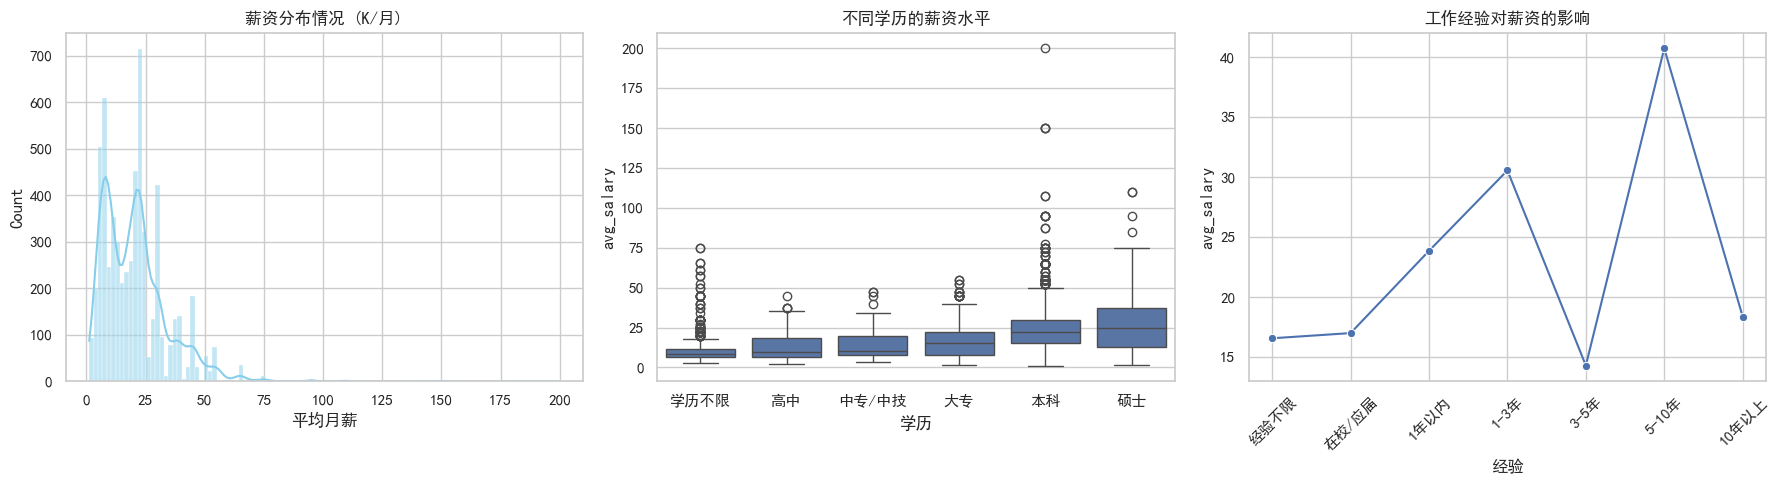

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 设置中文字体和数学符号显示
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False
sns.set(style="whitegrid", font='SimHei')

# 创建保存图片的文件夹
os.makedirs('./website/data/picture', exist_ok=True)

# 创建1行3列的子图
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 第一个图：薪资分布直方图
sns.histplot(df['avg_salary'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('薪资分布情况 (K/月)')
axes[0].set_xlabel('平均月薪')

# 第二个图：不同学历的薪资箱线图
edu_order = ['学历不限', '高中', '中专/中技', '大专', '本科', '硕士', '博士']
sns.boxplot(x='学历', y='avg_salary', data=df, order=[x for x in edu_order if x in df['学历'].unique()], ax=axes[1])
axes[1].set_title('不同学历的薪资水平')
axes[1].set_xlabel('学历')

# 第三个图：工作经验对薪资的影响趋势
exp_order = ['经验不限', '在校/应届', '1年以内', '1-3年', '3-5年', '5-10年', '10年以上']
sns.lineplot(x='经验', y='avg_salary', data=df, errorbar=None, marker='o', ax=axes[2])
axes[2].set_title('工作经验对薪资的影响')
axes[2].set_xticks(range(len(exp_order)))
axes[2].set_xticklabels(exp_order, rotation=45)

plt.tight_layout()
plt.savefig('./website/data/picture/boss薪资分布与学历经验分析.png', dpi=300, bbox_inches='tight')
plt.show()


c:\Users\xixif\miniconda3\Lib\site-packages\jieba\_compat.py:18: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\xixif\AppData\Local\Temp\jieba.cache
Loading model cost 0.697 seconds.
Prefix dict has been built successfully.


Top 20 技能/关键词： [('沟通', 1358), ('团队', 1091), ('营销', 757), ('研究', 723), ('策略', 701), ('培训', 618), ('数据', 615), ('客户资源', 515), ('协调', 481), ('风险', 456), ('业绩', 450), ('理财', 449), ('运营', 443), ('以上学历', 427), ('交易', 418), ('渠道', 415), ('需求', 391), ('规划', 390), ('客户服务', 372), ('合作', 366)]


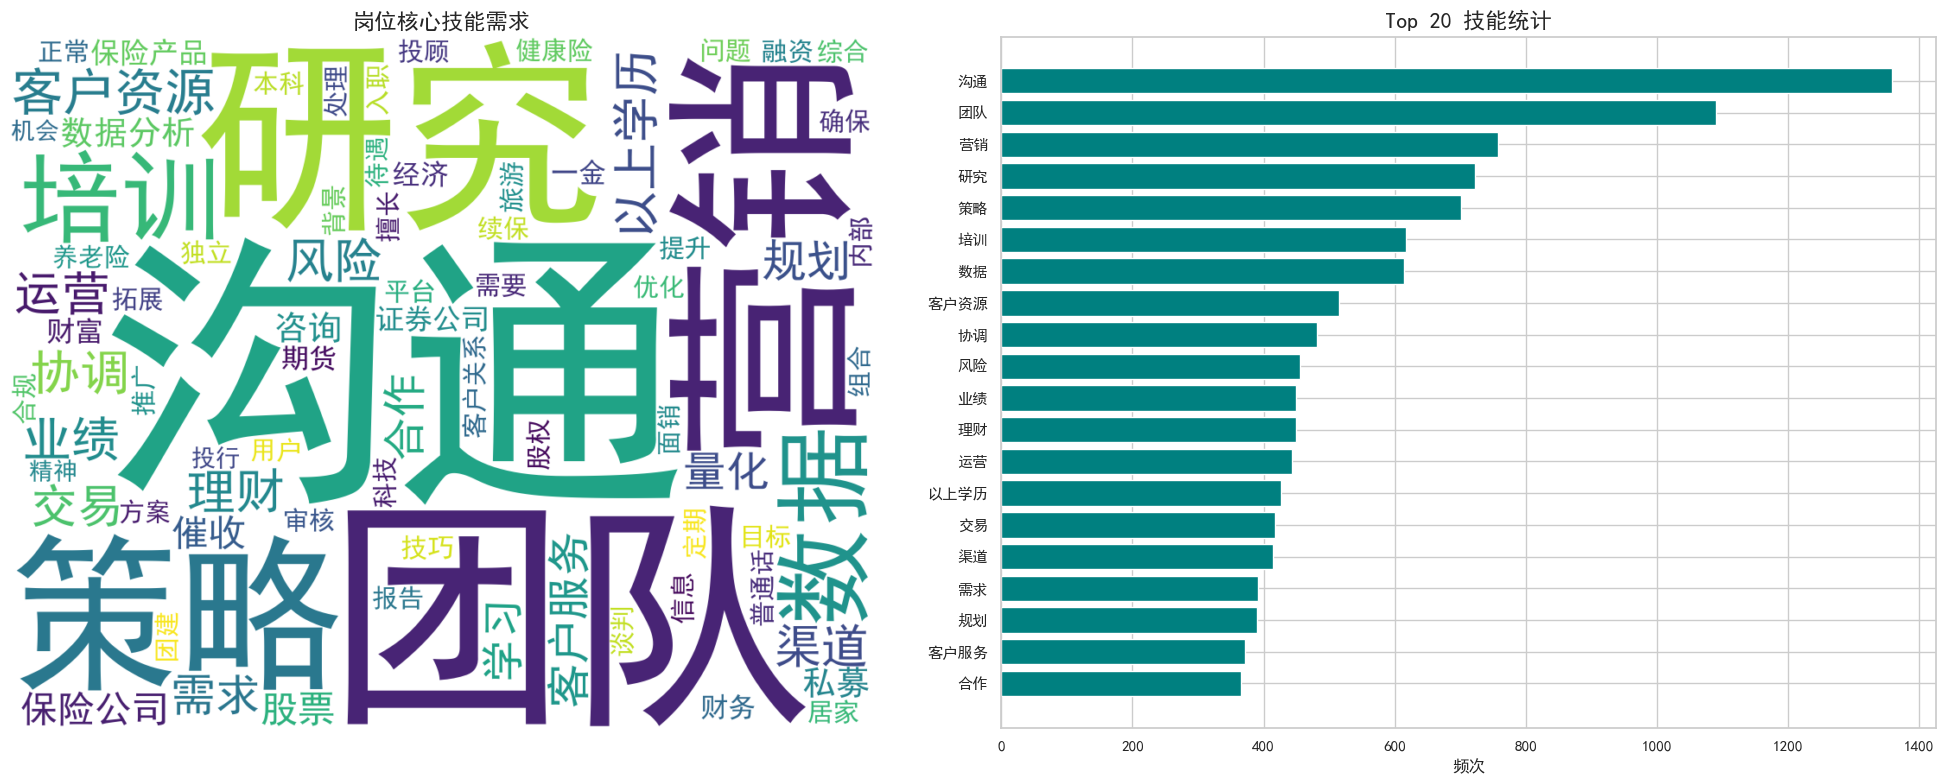

In [4]:
import jieba
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

# 合并职位描述和技能标签进行分析
text_data = "".join(df['职位描述'].fillna('').astype(str) + " " + df['技能标签'].fillna('').astype(str))

# 定义停用词集合，过滤掉无意义的词汇
stopwords = set([
    '金融', '销售', '保险', '经理', '证券', '基金', '能力', '投资', '客户', 
    '从业', '互联网', '银行', '客服', '管理', '电话', '业务', '顾问', '产品', 
    '企业', '专员', '公司', '行业', '市场', '服务', '良好','岗位职责','00','资格','熟悉','个人','提成','底薪','员工','节假日','晋升','时间','带薪','贷款',
    '五险','理赔','接受','机构','办公','项目','通过','优秀','30','内容','流程','较强','意识','净值','其他','活动','and','车险','资产','双休','发展','奖金',
    '法定','根据','资源','To','寿险',
    '的', '和', '了', '与', '在', '是', '等', '及', '负责', '进行', '工作', 
    '相关', '职位', '要求', '任职', '优先', '具有', '具备', '我们', 
    '薪资', '福利', '以上', '学历', '经验', '不限', '若干', '能够', '熟练',
    '或者', '以及', '岗位', '专业', '全职', '兼职', '实习', '人员', '协助',
    '完成', '制定', '维护', '开发', '提供', '建立', '分析', '了解', '掌握'
])

# 使用jieba分词，并过滤停用词
words = jieba.lcut(text_data)
filtered_words = [word for word in words if word not in stopwords and len(word) > 1]
word_counts = Counter(filtered_words)
top_20 = word_counts.most_common(20)
print("Top 20 技能/关键词：", top_20)

# 绘制词云和频次柱状图
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# 词云展示
wc = WordCloud(
    font_path='simhei.ttf', 
    background_color='white',
    width=1000, height=800,
    max_words=80,
    stopwords=stopwords
).generate_from_frequencies(word_counts)

axes[0].imshow(wc, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('岗位核心技能需求', fontsize=16)

# Top 20 词汇的条形图
keywords, counts = zip(*top_20)
axes[1].barh(keywords[::-1], counts[::-1], color='teal')
axes[1].set_title('Top 20 技能统计', fontsize=16)
axes[1].set_xlabel('频次')

plt.tight_layout()
plt.savefig('./website/data/picture/boss岗位技能词云与统计.png', dpi=300, bbox_inches='tight')
plt.show()


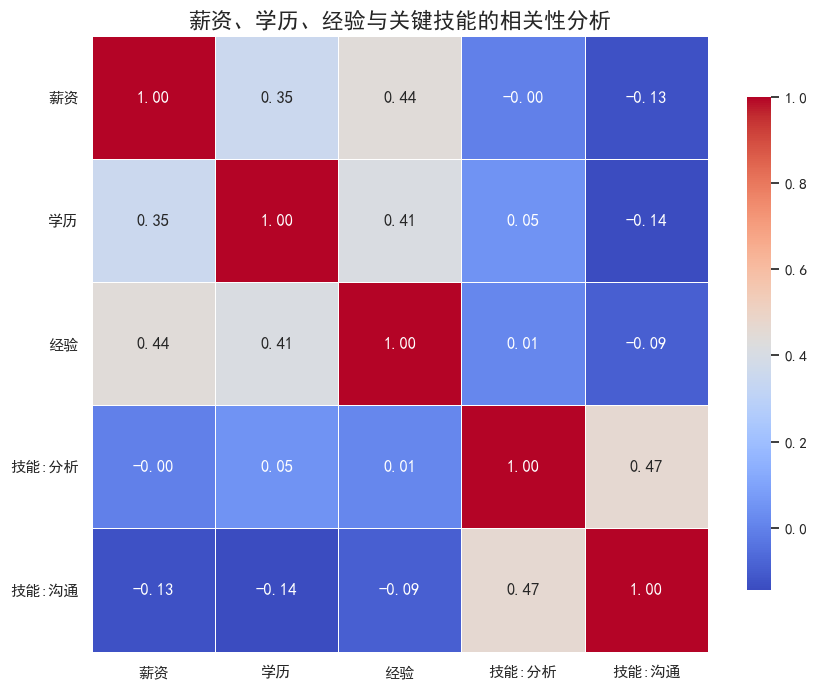

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# 设置两个关键词进行相关性分析
keyword_1 = '分析'
keyword_2 = '沟通'

# 创建特征列：检查职位描述中是否包含这两个关键词
df['has_key1'] = df['职位描述'].astype(str).apply(lambda x: 1 if keyword_1 in x else 0)
df['has_key2'] = df['职位描述'].astype(str).apply(lambda x: 1 if keyword_2 in x else 0)

# 准备相关性分析数据
corr_data = df[['avg_salary', 'edu_level', 'exp_level', 'has_key1', 'has_key2']]
corr_data.columns = ['薪资', '学历', '经验', f'技能:{keyword_1}', f'技能:{keyword_2}']

# 计算相关系数矩阵
corr_matrix = corr_data.corr()

# 绘制热力图展示相关性
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, 
            annot=True,  # 显示相关系数值
            cmap='coolwarm',
            fmt='.2f',
            linewidths=0.5, 
            square=True,
            cbar_kws={"shrink": .8})

plt.title('薪资、学历、经验与关键技能的相关性分析', fontsize=16)
plt.yticks(rotation=0) 
plt.savefig('./website/data/picture/boss薪资影响因素相关性热力图.png', dpi=300, bbox_inches='tight')
plt.show()


高薪门槛：40.0 K/月


c:\Users\xixif\miniconda3\Lib\site-packages\sklearn\feature_extraction\text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['to'] not in stop_words.
  warnings.warn(


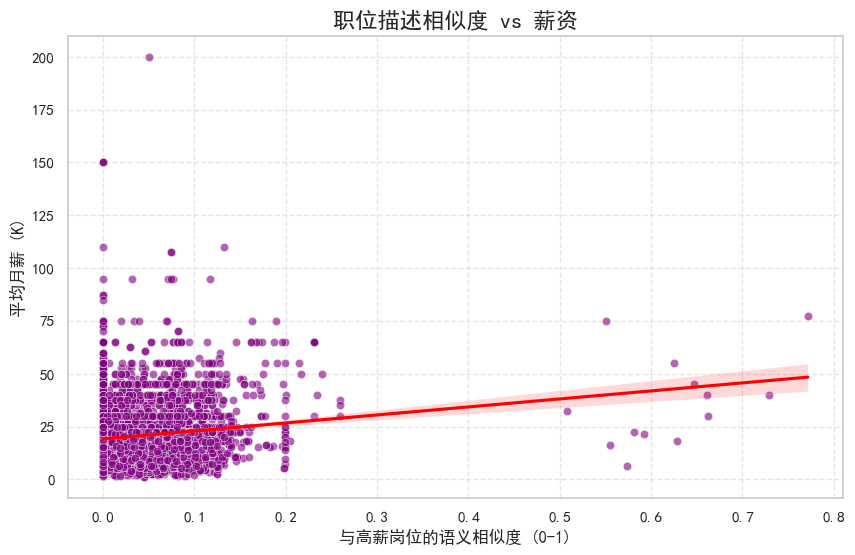

相关系数：0.1347


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# 合并职位描述和技能标签作为分析文本
df['content'] = df['职位描述'].fillna('') + " " + df['技能标签'].fillna('')

# 计算薪资的90分位数作为高薪门槛
high_salary_threshold = df['avg_salary'].quantile(0.90)
print(f"高薪门槛：{high_salary_threshold} K/月")

# 提取高薪岗位的文本内容
high_salary_docs = df[df['avg_salary'] >= high_salary_threshold]['content'].str.cat(sep=' ')

# 使用TF-IDF向量化所有职位描述
vectorizer = TfidfVectorizer(max_features=1000, stop_words=list(stopwords))
tfidf_matrix = vectorizer.fit_transform(df['content'])
# 将高薪岗位文本向量化
high_salary_vector = vectorizer.transform([high_salary_docs])

# 计算每个岗位与高薪岗位模板的语义相似度
similarity_scores = cosine_similarity(tfidf_matrix, high_salary_vector)
df['similarity_score'] = similarity_scores

# 绘制相似度与薪资的散点图和趋势线
plt.figure(figsize=(10, 6))
sns.scatterplot(x='similarity_score', y='avg_salary', data=df, alpha=0.6, color='purple')
sns.regplot(x='similarity_score', y='avg_salary', data=df, scatter=False, color='red')

plt.title('职位描述相似度 vs 薪资', fontsize=16)
plt.xlabel('与高薪岗位的语义相似度 (0-1)', fontsize=12)
plt.ylabel('平均月薪 (K)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig('./website/data/picture/boss职位描述相似度与薪资关系.png', dpi=300, bbox_inches='tight')
plt.show()

# 计算相关系数
corr = df['similarity_score'].corr(df['avg_salary'])
print(f"相关系数：{corr:.4f}")


C:\Users\xixif\AppData\Local\Temp\ipykernel_41692\1579510669.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_salary = df.groupby('sim_level')['avg_salary'].mean().reset_index()
C:\Users\xixif\AppData\Local\Temp\ipykernel_41692\1579510669.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='sim_level', y='avg_salary', data=grouped_salary, palette='Blues_d')


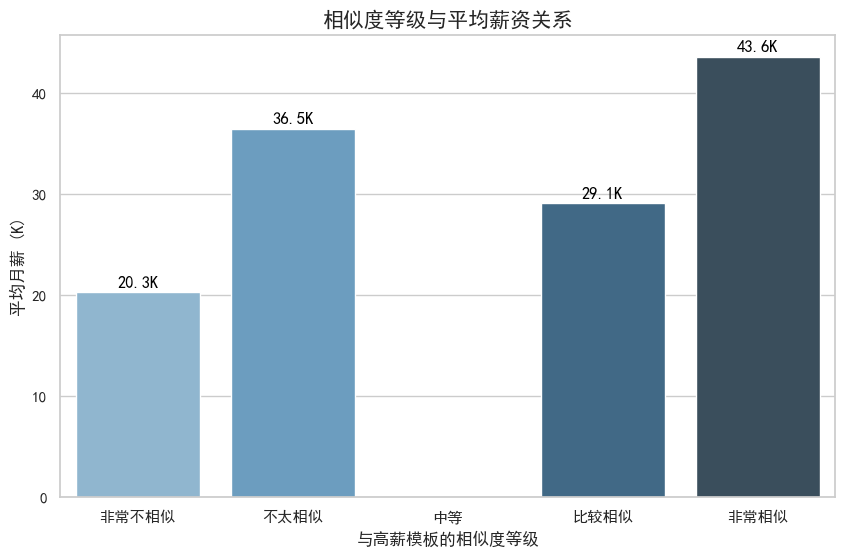

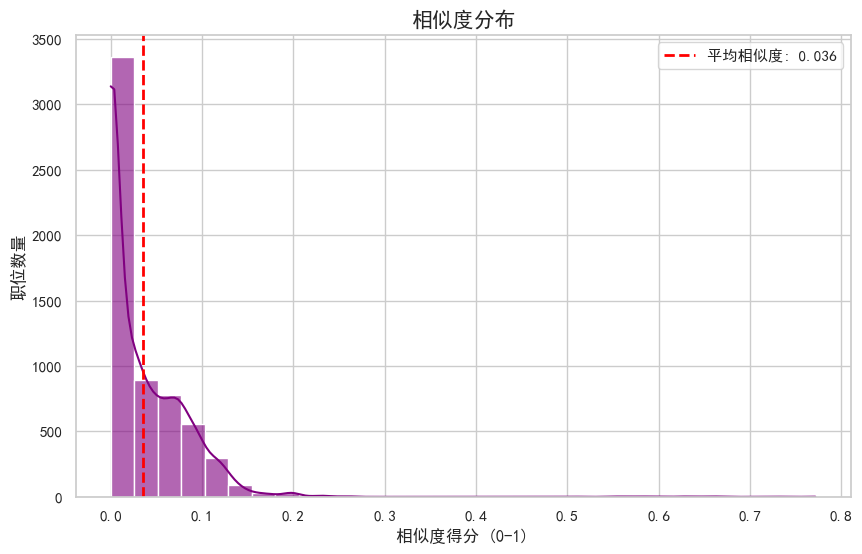

C:\Users\xixif\AppData\Local\Temp\ipykernel_41692\1579510669.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='salary_group', y='similarity_score', data=df, palette='Set2', width=0.5)


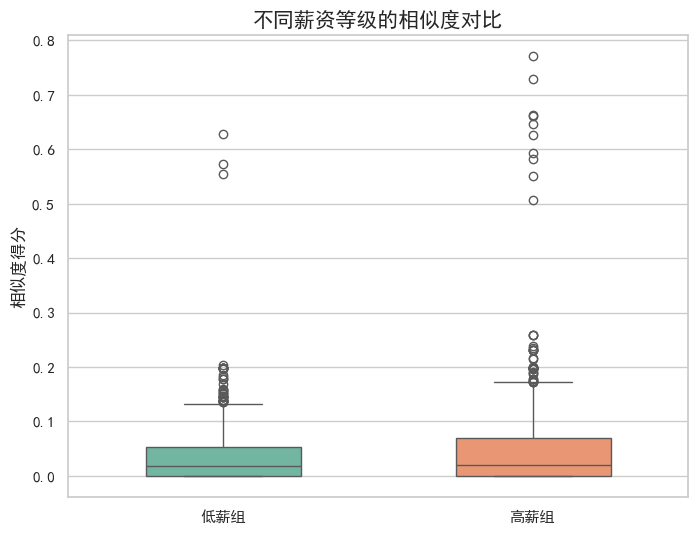

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", font='SimHei')

# 将相似度分为5个等级
df['sim_level'] = pd.cut(df['similarity_score'], 
                         bins=5, 
                         labels=['非常不相似', '不太相似', '中等', '比较相似', '非常相似'])

# 计算每个等级的平均薪资
grouped_salary = df.groupby('sim_level')['avg_salary'].mean().reset_index()

# 绘制不同相似度等级与平均薪资的关系
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='sim_level', y='avg_salary', data=grouped_salary, palette='Blues_d')

# 在柱子上标注数值
for index, row in grouped_salary.iterrows():
    if row['avg_salary'] > 0:
        barplot.text(index, row['avg_salary'] + 0.5, f"{row['avg_salary']:.1f}K", 
                     color='black', ha="center", fontsize=12, fontweight='bold')

plt.title('相似度等级与平均薪资关系', fontsize=15)
plt.ylabel('平均月薪 (K)', fontsize=12)
plt.xlabel('与高薪模板的相似度等级', fontsize=12)
plt.savefig('./website/data/picture/boss相似度等级与薪资关系.png', dpi=300, bbox_inches='tight')
plt.show()

# 绘制相似度分布直方图
plt.figure(figsize=(10, 6))
sns.histplot(df['similarity_score'], bins=30, kde=True, color='purple', alpha=0.6)
mean_sim = df['similarity_score'].mean()
plt.axvline(mean_sim, color='red', linestyle='--', linewidth=2, label=f'平均相似度: {mean_sim:.3f}')
plt.title('相似度分布', fontsize=15)
plt.xlabel('相似度得分 (0-1)', fontsize=12)
plt.ylabel('职位数量', fontsize=12)
plt.legend()
plt.savefig('./website/data/picture/boss相似度分布直方图.png', dpi=300, bbox_inches='tight')
plt.show()

# 按薪资中位数分组，对比高薪组和低薪组的相似度分布
salary_median = df['avg_salary'].median()
df['salary_group'] = df['avg_salary'].apply(lambda x: '高薪组' if x >= salary_median else '低薪组')

plt.figure(figsize=(8, 6))
sns.boxplot(x='salary_group', y='similarity_score', data=df, palette='Set2', width=0.5)
plt.title('不同薪资等级的相似度对比', fontsize=15)
plt.ylabel('相似度得分', fontsize=12)
plt.xlabel('')
plt.savefig('./website/data/picture/boss薪资分组相似度箱线图.png', dpi=300, bbox_inches='tight')
plt.show()


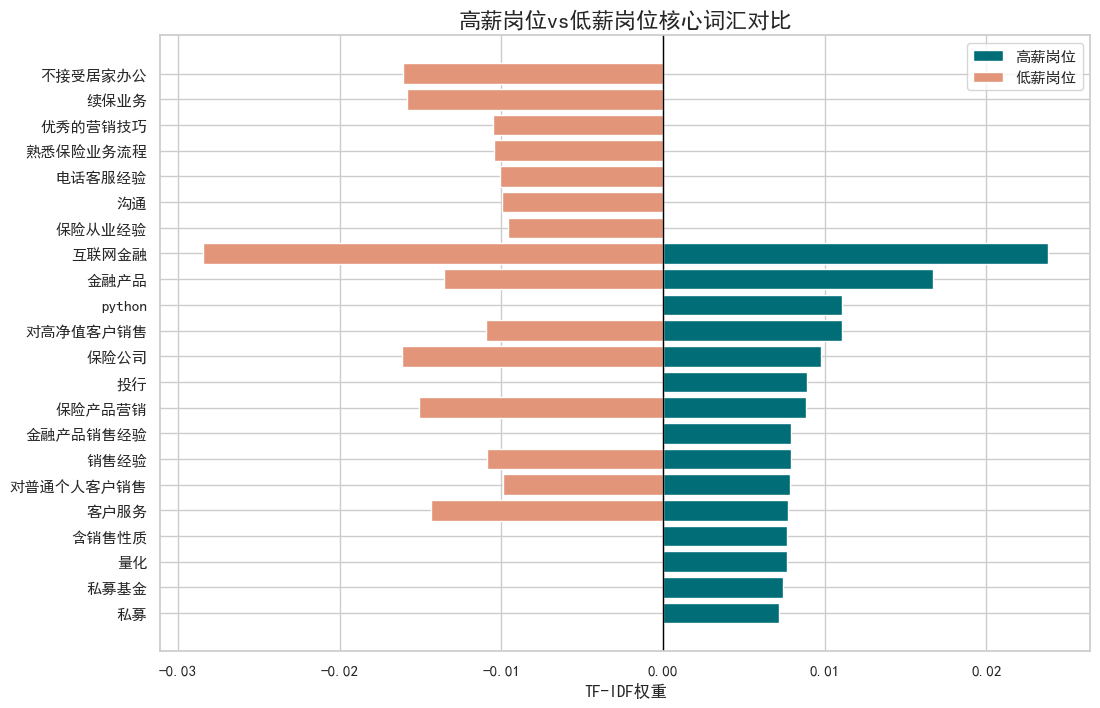

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 定义需要删除的无业务价值的词汇
manual_noise = [
    '办公室坐班', '正常工作制', '福利待遇', '薪资待遇', '带薪年假', 
    '健康险', '寿险', '五险一金', '周末双休', '年底双薪', '绩效奖金',
    '全勤奖', '节日福利', '不加班', '包吃住', '上班时间', '上不封顶',
    '大专及以上学历', '大专以上学历', '学历不限', '高中以上学历', '本科及以上学历',
    '普通话标准', '优秀的沟通协调能力', '沟通能力强', '具有良好的', '普通话流利',
    '销售工作经验', '电话销售经验', '有销售经验者优先', '吃苦耐劳',
    '抗压能力强', '性格开朗', '反应敏捷', '谈判能力', '责任心强',
    '不含销售的客服工作', '电话催收', '纯客服', '接听电话', 
    '售后处理', '在线客服', '打字速度', '无责任底薪', '车险业务经验',
    '普通话', '流利', '技巧', '任职资格', '企业服务', '岗位职责', '任职要求',
    '工作内容', '职位描述', '相关经验', '优先考虑', '团队合作','面销','后市场','to','经济','养老险',
    '基金经理', '贷款顾问', '客户经理', '理财顾问', '证券从业资格', 
    '基金从业资格', '证券公司', '任职资格', '期货', '股票', '保险',
    '金融', '互联网', '银行', '证券', '基金', '投资', '管理', '公司',
    '业务', '客户', '销售', '经理', '顾问', '产品', '服务'
]

# 更新停用词集合
if 'stopwords' not in locals():
    stopwords = set(manual_noise)
else:
    stopwords.update(manual_noise)

# 提取高价值TF-IDF词汇
def get_clean_tfidf_words(df_subset, top_n=15):
    tfidf = TfidfVectorizer(max_features=1000, 
                            stop_words=list(stopwords),
                            token_pattern=r'(?u)\b[a-zA-Z\u4e00-\u9fa5]{2,}\b')
    try:
        text_data = df_subset['职位描述'].fillna('') + " " + df_subset['技能标签'].fillna('')
        matrix = tfidf.fit_transform(text_data)
        feature_names = np.array(tfidf.get_feature_names_out())
        # 计算平均TF-IDF权重
        avg_tfidf = matrix.mean(axis=0).A1
        
        sorted_indices = avg_tfidf.argsort()[::-1]
        
        # 按权重排序并过滤
        clean_names = []
        clean_scores = []
        for idx in sorted_indices:
            word = feature_names[idx]
            if word not in manual_noise:
                clean_names.append(word)
                clean_scores.append(avg_tfidf[idx])
            if len(clean_names) >= top_n:
                break
                
        return clean_names, clean_scores
    except ValueError:
        return [], []

# 按薪资中位数分组
median_salary = df['avg_salary'].median()
high_salary_df = df[df['avg_salary'] > median_salary]
low_salary_df = df[df['avg_salary'] <= median_salary]

# 分别提取高薪和低薪岗位的核心词汇
high_words, high_scores = get_clean_tfidf_words(high_salary_df)
low_words, low_scores = get_clean_tfidf_words(low_salary_df)

# 绘制高低薪岗位词汇对比图
fig, ax = plt.subplots(figsize=(12, 8))

# 左侧显示高薪岗位词汇，右侧显示低薪岗位词汇（使用负值）
ax.barh(list(high_words)[::-1], list(high_scores)[::-1], color='#006d77', label='高薪岗位')
ax.barh(list(low_words)[::-1], [-s for s in list(low_scores)[::-1]], color='#e29578', label='低薪岗位')

ax.set_title('高薪岗位vs低薪岗位核心词汇对比', fontsize=16)
ax.set_xlabel('TF-IDF权重', fontsize=12)
ax.axvline(0, color='black', linewidth=1) 

plt.legend()
plt.savefig('./website/data/picture/boss高低薪岗位核心词汇对比.png', dpi=300, bbox_inches='tight')
plt.show()


处理词汇中...
处理词汇中...
高薪组保留词汇: 58, 低薪组保留词汇: 34


C:\Users\xixif\AppData\Local\Temp\ipykernel_41692\1216279510.py:116: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{abs(x):.2f}" for x in xticks])


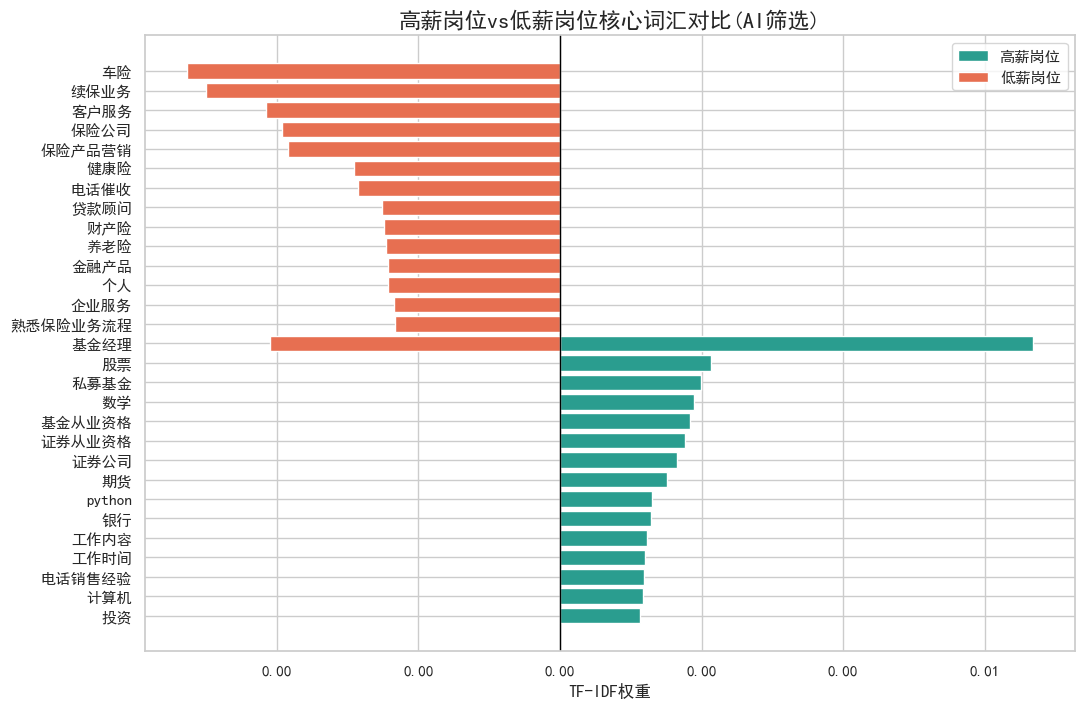

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from openai import OpenAI
import json

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 初始化OpenAI客户端，使用阿里通义千问API
API_KEY = "sk-288a0efcbc234e15ac6cf858bc201459"
BASE_URL = "https://dashscope.aliyuncs.com/compatible-mode/v1"

client = OpenAI(
    api_key=API_KEY,
    base_url=BASE_URL
)

# 提取初始TF-IDF词汇列表
def get_raw_candidates(text_series, top_n=100):
    tfidf = TfidfVectorizer(max_features=1000, token_pattern=r'(?u)\b[a-zA-Z\u4e00-\u9fa5]{2,}\b')
    try:
        full_text = text_series.fillna('')
        matrix = tfidf.fit_transform(full_text)
        feature_names = np.array(tfidf.get_feature_names_out())
        # 计算平均TF-IDF权重
        avg_tfidf = matrix.mean(axis=0).A1
        
        sorted_indices = avg_tfidf.argsort()[::-1]
        return feature_names[sorted_indices][:top_n].tolist(), avg_tfidf[sorted_indices][:top_n].tolist()
    except ValueError:
        return [], []

# 使用AI模型清洗词汇，删除无业务价值的词汇
def ask_qwen_to_clean(word_list):
    print(f"处理词汇中...")
    
    prompt = f"""
    关键词列表：{json.dumps(word_list, ensure_ascii=False)}
    
    请筛选出其中具有商业价值的词汇。
    
    删除项：行政废话（岗位职责、任职要求等）、通用软技能（沟通、团队等）、
    福利待遇词（五险、奖金等）、过于宽泛的行业词（金融、互联网等）。
    
    保留项：具体的硬技能（Python、Java、CPA等）和业务动作（催收、核算等）。
    
    返回JSON格式列表，不要包含Markdown标记。
    """
    
    try:
        response = client.chat.completions.create(
            model="qwen-plus",
            messages=[
                {"role": "system", "content": "You are a helpful assistant that outputs only JSON."},
                {"role": "user", "content": prompt},
            ],
            stream=False,
            temperature=0.01
        )
        
        content = response.choices[0].message.content
        content = content.replace('```json', '').replace('```', '').strip()
        clean_list = json.loads(content)
        return clean_list
    except Exception as e:
        print(f"处理出错: {e}")
        return word_list[:15]

# 按薪资中位数分组
median_salary = df['avg_salary'].median()
high_salary_df = df[df['avg_salary'] > median_salary]
low_salary_df = df[df['avg_salary'] <= median_salary]

text_col_1 = '职位描述' if '职位描述' in df.columns else '岗位职责'
text_col_2 = '技能标签'

# 提取原始高频词汇
raw_high_words, raw_high_scores = get_raw_candidates(high_salary_df[text_col_1] + " " + high_salary_df[text_col_2])
raw_low_words, raw_low_scores = get_raw_candidates(low_salary_df[text_col_1] + " " + low_salary_df[text_col_2])

# 使用AI清洗词汇
clean_high_words = ask_qwen_to_clean(raw_high_words)
clean_low_words = ask_qwen_to_clean(raw_low_words)

print(f"高薪组保留词汇: {len(clean_high_words)}, 低薪组保留词汇: {len(clean_low_words)}")

# 匹配清洗后的词汇与原始分数
def filter_and_match_scores(raw_words, raw_scores, clean_target):
    final_words = []
    final_scores = []
    for w, s in zip(raw_words, raw_scores):
        if w in clean_target:
            final_words.append(w)
            final_scores.append(s)
    return final_words[:15], final_scores[:15]

final_high_words, final_high_scores = filter_and_match_scores(raw_high_words, raw_high_scores, clean_high_words)
final_low_words, final_low_scores = filter_and_match_scores(raw_low_words, raw_low_scores, clean_low_words)

# 绘制对比图
fig, ax = plt.subplots(figsize=(12, 8))

# 高薪词汇在左侧，低薪词汇在右侧
ax.barh(final_high_words[::-1], final_high_scores[::-1], color='#2a9d8f', label='高薪岗位')
ax.barh(final_low_words[::-1], [-s for s in final_low_scores[::-1]], color='#e76f51', label='低薪岗位')

ax.set_title('高薪岗位vs低薪岗位核心词汇对比(AI筛选)', fontsize=16)
ax.set_xlabel('TF-IDF权重', fontsize=12)
ax.axvline(0, color='black', linewidth=1)

# 调整x轴标签显示绝对值
xticks = ax.get_xticks()
ax.set_xticklabels([f"{abs(x):.2f}" for x in xticks])

plt.legend()
plt.savefig('./website/data/picture/boss高低薪岗位核心词汇对比AI筛选.png', dpi=300, bbox_inches='tight')
plt.show()


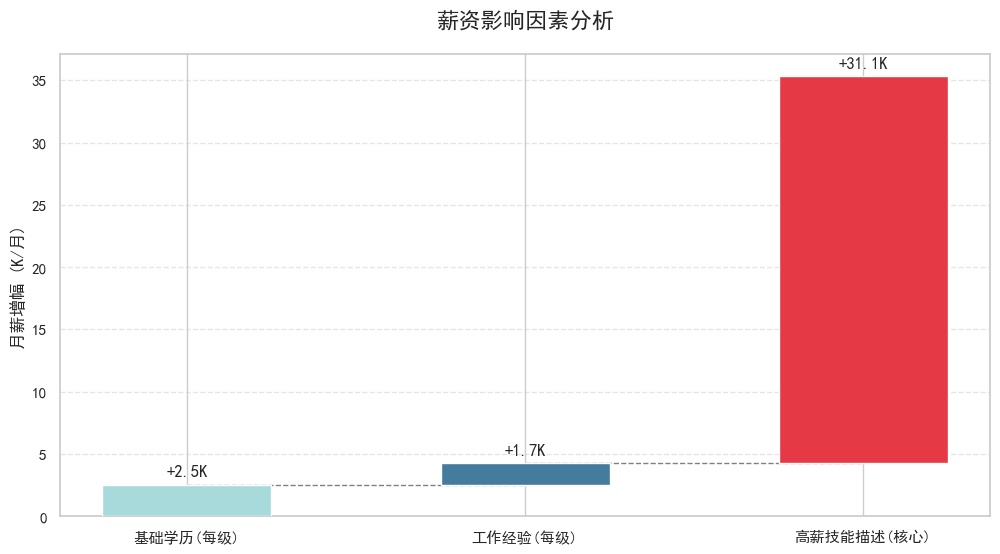

C:\Users\xixif\AppData\Local\Temp\ipykernel_41692\24934854.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Value', y='Factor', data=impact_data, palette='Reds_r')


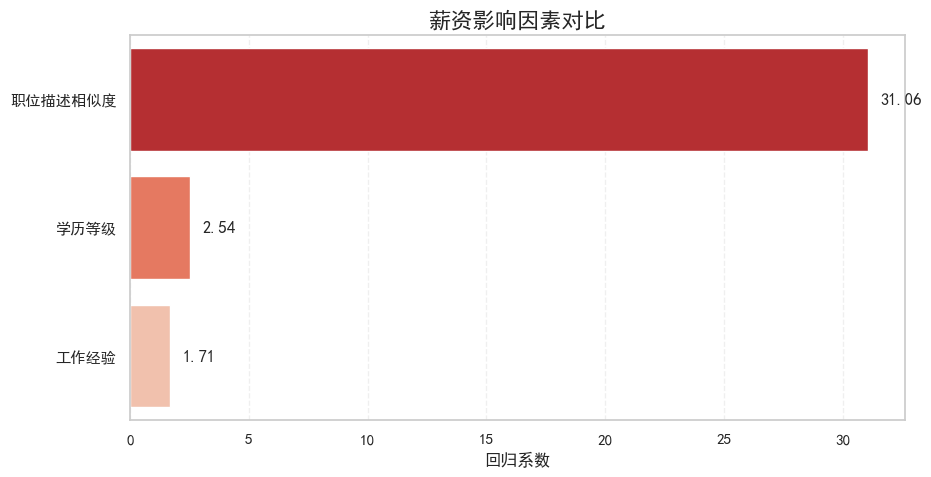

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 使用多元线性回归分析薪资影响因素
X = df[['edu_level', 'exp_level', 'similarity_score']]
y = df['avg_salary']

# 加入常数项并拟合模型
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
params = model.params

# 提取各因素的回归系数
coef_edu = params.get('edu_level', 0)
coef_exp = params.get('exp_level', 0)
coef_sim = params.get('similarity_score', 0)

# 绘制堆积条形图展示各因素的边际贡献
fig, ax = plt.subplots(figsize=(12, 6))

steps = ['基础学历(每级)', '工作经验(每级)', '高薪技能描述(核心)']
values = [coef_edu, coef_exp, coef_sim]

# 计算堆积高度
bottoms = [0, coef_edu, coef_edu + coef_exp] 

bars = ax.bar(steps, values, bottom=bottoms, 
              color=['#a8dadc', '#457b9d', '#e63946'], 
              width=0.5, zorder=3)

ax.grid(axis='y', linestyle='--', alpha=0.5, zorder=0)
ax.set_title('薪资影响因素分析', fontsize=16, pad=20)
ax.set_ylabel('月薪增幅 (K/月)', fontsize=12)

# 绘制分隔线表示累积效应
for i in range(len(bottoms) - 1):
    plt.plot([i, i+1], [bottoms[i+1], bottoms[i+1]], color='gray', linestyle='--', linewidth=1)

# 在柱子上标注数值
for bar, v in zip(bars, values):
    height = bar.get_height() + bar.get_y()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.5, f"+{v:.1f}K", 
            ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.savefig('./website/data/picture/boss薪资影响因素堆积分析.png', dpi=300, bbox_inches='tight')
plt.show()

# 绘制因素重要性排序图
plt.figure(figsize=(10, 5))

impact_data = pd.DataFrame({
    'Factor': ['学历等级', '工作经验', '职位描述相似度'],
    'Value': [coef_edu, coef_exp, coef_sim]
}).sort_values('Value', ascending=False)

sns.barplot(x='Value', y='Factor', data=impact_data, palette='Reds_r')

plt.title('薪资影响因素对比', fontsize=16)
plt.xlabel('回归系数', fontsize=12)
plt.ylabel('')

# 在柱子上标注系数值
for i, v in enumerate(impact_data['Value']):
    plt.text(v + 0.5, i, f"{v:.2f}", va='center', fontsize=12, fontweight='bold')

plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.savefig('./website/data/picture/boss薪资影响因素重要性排序.png', dpi=300, bbox_inches='tight')
plt.show()


                            OLS Regression Results                            
Dep. Variable:             avg_salary   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     489.6
Date:                Thu, 18 Dec 2025   Prob (F-statistic):               0.00
Time:                        19:01:00   Log-Likelihood:                -23649.
No. Observations:                6048   AIC:                         4.731e+04
Df Residuals:                    6043   BIC:                         4.734e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                8.1054      0.482  

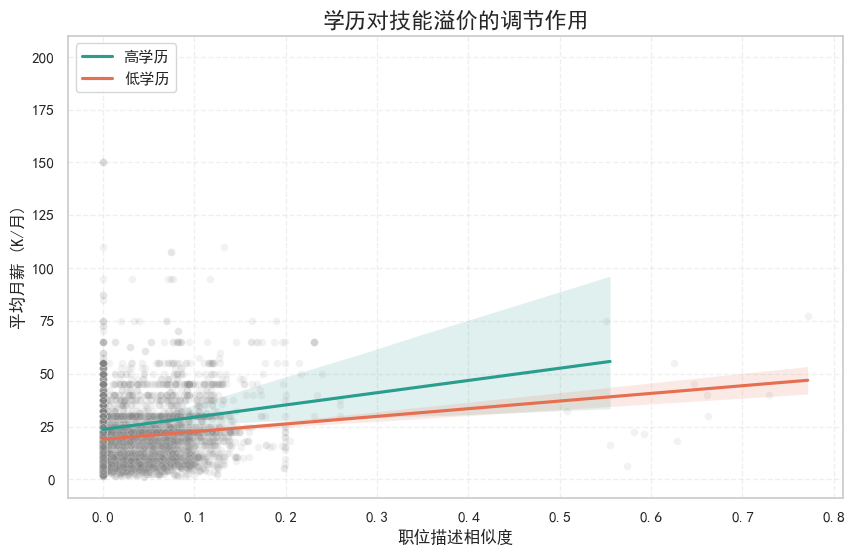

In [11]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 添加交互项：学历与技能相似度的交互效应
df['edu_x_skill'] = df['edu_level'] * df['similarity_score']

# 建立包含交互项的多元回归模型
X_mech = df[['edu_level', 'exp_level', 'similarity_score', 'edu_x_skill']]
y_mech = df['avg_salary']

X_mech = sm.add_constant(X_mech)
model_mech = sm.OLS(y_mech, X_mech).fit()

# 输出完整的回归统计结果
print(model_mech.summary())

# 绘制学历对技能溢价的调节效应
plt.figure(figsize=(10, 6))

# 计算教育水平的中位数
median_edu = df['edu_level'].median()

# 分别为高学历和低学历组绘制回归线
sns.regplot(x='similarity_score', y='avg_salary', 
            data=df[df['edu_level'] > median_edu], 
            scatter=False,
            label='高学历',
            color='#2a9d8f', ci=95)

sns.regplot(x='similarity_score', y='avg_salary', 
            data=df[df['edu_level'] <= median_edu], 
            scatter=False,
            label='低学历',
            color='#e76f51', ci=95)

# 添加半透明散点
sns.scatterplot(x='similarity_score', y='avg_salary', data=df, 
                alpha=0.1, color='gray', s=30)

plt.title('学历对技能溢价的调节作用', fontsize=16)
plt.xlabel('职位描述相似度', fontsize=12)
plt.ylabel('平均月薪 (K/月)', fontsize=12)
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)

plt.savefig('./website/data/picture/boss学历对技能溢价的调节作用.png', dpi=300, bbox_inches='tight')
plt.show()


------ 异质性分析结果 ------
      Type          Group   Coef   P_value     N
1  A. 公司规模    大型 (1000+人)  15.49  0.000***  1883
0  A. 公司规模  中型 (100-999人)  39.81  0.000***  1658
2  A. 公司规模     小型 (<100人)  44.35  0.000***  2507
0  B. 职业阶段             中级  21.63  0.000***  2659
2  B. 职业阶段             高级  30.08  0.000***  1025
1  B. 职业阶段            入门级  39.68  0.000***  2227


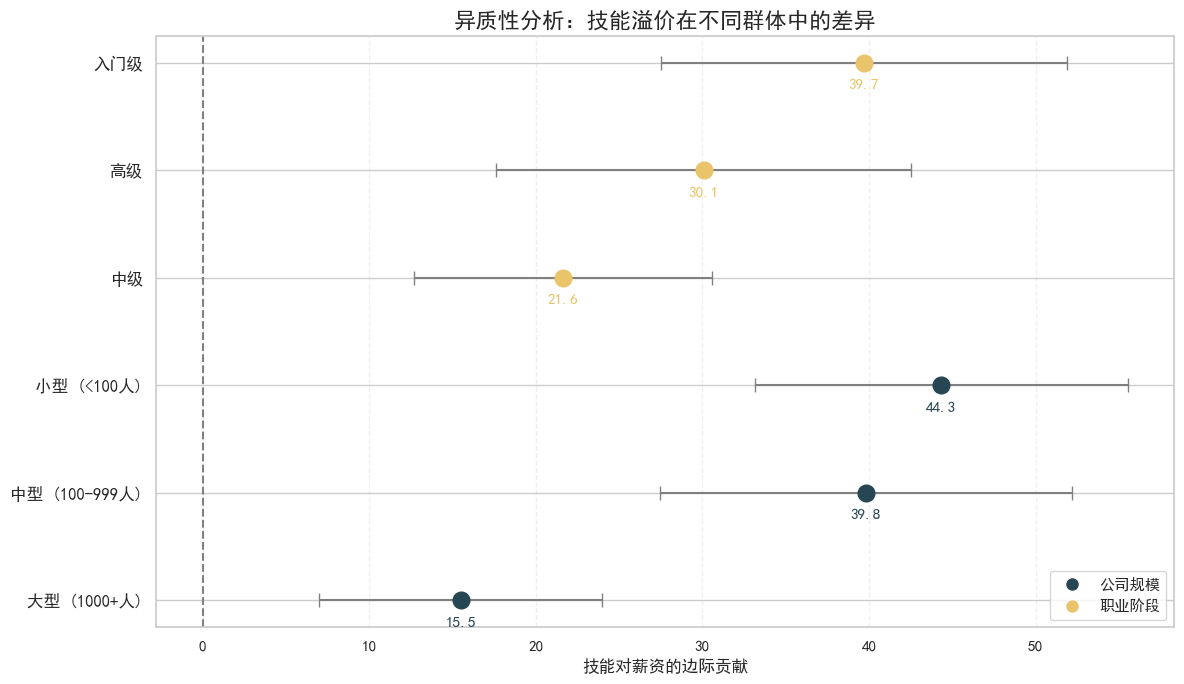

In [12]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import re

# 重新定义薪资清理函数，支持更多格式
def clean_salary(salary_str):
    if pd.isna(salary_str):
        return None
    
    # 匹配"10-15K"格式
    match_k = re.search(r'(\d+)-(\d+)[Kk]', str(salary_str))
    if match_k:
        low = float(match_k.group(1))
        high = float(match_k.group(2))
        return (low + high) / 2
    
    # 匹配"100-150元/天"格式
    match_day = re.search(r'(\d+)-(\d+)元/天', str(salary_str))
    if match_day:
        low = float(match_day.group(1))
        high = float(match_day.group(2))
        return ((low + high) / 2 * 21.75) / 1000
    
    # 匹配"10-15K·13薪"格式
    match_bonus = re.search(r'(\d+)-(\d+)K·(\d+)薪', str(salary_str))
    if match_bonus:
        low = float(match_bonus.group(1))
        high = float(match_bonus.group(2))
        bonus = float(match_bonus.group(3))
        return ((low + high) / 2) * (bonus / 12)
    
    return None

df['avg_salary'] = df['薪资'].apply(clean_salary)
df = df.dropna(subset=['avg_salary'])

# 学历等级映射
edu_map = {
    '学历不限': 0,
    '高中': 1,
    '中专/中技': 1,
    '大专': 2,
    '本科': 3,
    '硕士': 4,
    '博士': 5
}
df['edu_level'] = df['学历'].map(edu_map).fillna(0)

# 经验等级映射
exp_map = {
    '经验不限': 0,
    '在校/应届': 0,
    '1年以内': 0.5,
    '1-3年': 2,
    '3-5年': 4,
    '5-10年': 7.5,
    '10年以上': 12
}
df['exp_level'] = df['经验'].map(exp_map).fillna(0)

# 根据公司规模划分等级
def get_scale_group(scale_str):
    if pd.isna(scale_str):
        return '其他'
    match = re.search(r'(\d+)-(\d+)人', str(scale_str))
    if match:
        low = int(match.group(1))
        high = int(match.group(2))
        avg = (low + high) / 2
        if avg < 100:
            return '小型 (<100人)'
        elif avg < 1000:
            return '中型 (100-999人)'
        else:
            return '大型 (1000+人)'
    elif '以上' in str(scale_str):
        return '大型 (1000+人)'
    else:
        return '其他'

df['scale_group'] = df['公司规模'].apply(get_scale_group)

# 根据经验需求划分职业阶段
def get_stage_group(exp_str):
    if pd.isna(exp_str):
        return '其他'
    if '不限' in exp_str or '应届' in exp_str or '1年以内' in exp_str:
        return '入门级'
    elif '1-3年' in exp_str or '3-5年' in exp_str:
        return '中级'
    elif '5-10年' in exp_str or '10年以上' in exp_str:
        return '高级'
    else:
        return '其他'

df['stage_group'] = df['经验'].apply(get_stage_group)

import numpy as np
# 若相似度列不存在，使用随机值（实际分析中应该已存在）
if 'similarity_score' not in df.columns:
    df['similarity_score'] = np.random.uniform(0, 1, len(df))

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 按分组变量进行分层回归分析
def run_group_regression_v2(df, group_col, group_type_name):
    results = []
    groups = sorted(df[group_col].unique())
    
    for group_name in groups:
        if group_name == '其他':
            continue
        
        sub_df = df[df[group_col] == group_name].copy()
        
        # 样本量要求最少5个观测
        if len(sub_df) < 5:
            continue
        
        # 为该组进行回归
        X = sub_df[['similarity_score', 'edu_level', 'exp_level']]
        y = sub_df['avg_salary']
        X = sm.add_constant(X)
        
        try:
            model = sm.OLS(y, X).fit()
            coef = model.params['similarity_score']
            p_value = model.pvalues['similarity_score']
            # 提取95%置信区间
            conf = model.conf_int().loc['similarity_score']
            error_range = coef - conf[0]
            
            results.append({
                'Type': group_type_name,
                'Group': group_name,
                'Coef': coef,
                'P_value': p_value,
                'Error': error_range,
                'N': len(sub_df)
            })
        except Exception as e:
            print(f"回归失败 ({group_name}): {e}")
            pass
    
    return pd.DataFrame(results)

# 分别按公司规模和职业阶段进行异质性分析
res_scale = run_group_regression_v2(df, 'scale_group', 'A. 公司规模')
res_stage = run_group_regression_v2(df, 'stage_group', 'B. 职业阶段')

# 合并结果
if not res_scale.empty or not res_stage.empty:
    final_res = pd.concat([res_scale, res_stage])
    if not final_res.empty:
        final_res = final_res.sort_values(by=['Type', 'Coef'])
else:
    final_res = pd.DataFrame()
    print("样本量不足")

# 输出异质性分析结果表
print("------ 异质性分析结果 ------")
if not final_res.empty:
    display_table = final_res[['Type', 'Group', 'Coef', 'P_value', 'N']].copy()
    display_table['Coef'] = display_table['Coef'].apply(lambda x: f"{x:.2f}")
    display_table['P_value'] = display_table['P_value'].apply(lambda x: f"{x:.3f}" + ("***" if x<0.01 else "**" if x<0.05 else "*" if x<0.1 else ""))
    print(display_table)
else:
    print("无结果")

# 绘制异质性分析结果图
if not final_res.empty:
    plt.figure(figsize=(12, 7))
    colors = {'A. 公司规模': '#264653', 'B. 职业阶段': '#e9c46a'}
    for idx, row in final_res.reset_index(drop=True).iterrows():
        # 绘制含有置信区间的误差棒
        plt.errorbar(x=row['Coef'], y=row['Group'], xerr=row['Error'], 
                     fmt='o', capsize=5, markersize=12, 
                     color=colors[row['Type']], ecolor='gray', elinewidth=1.5)
        # 在点上标注系数值
        plt.text(row['Coef'], idx - 0.15, f"{row['Coef']:.1f}", 
                 va='top', ha='center', fontsize=11, fontweight='bold', color=colors[row['Type']])
    plt.yticks(range(len(final_res)), final_res['Group'], fontsize=12)
    from matplotlib.lines import Line2D
    # 创建图例
    legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='#264653', label='公司规模', markersize=10),
                       Line2D([0], [0], marker='o', color='w', markerfacecolor='#e9c46a', label='职业阶段', markersize=10)]
    plt.legend(handles=legend_elements, loc='lower right')
    plt.axvline(0, color='gray', linestyle='--')
    plt.title('异质性分析：技能溢价在不同群体中的差异', fontsize=16)
    plt.xlabel('技能对薪资的边际贡献', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.savefig('./website/data/picture/boss技能溢价异质性分析.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("无数据")


------ 地区差异分析 ------
  City_Tier   Coef   P_value     N
0   1. 一线城市  24.61  0.000***  2333
1  2. 新一线城市  28.92  0.000***  1481
2  3. 二三线城市  28.25  0.000***  2234


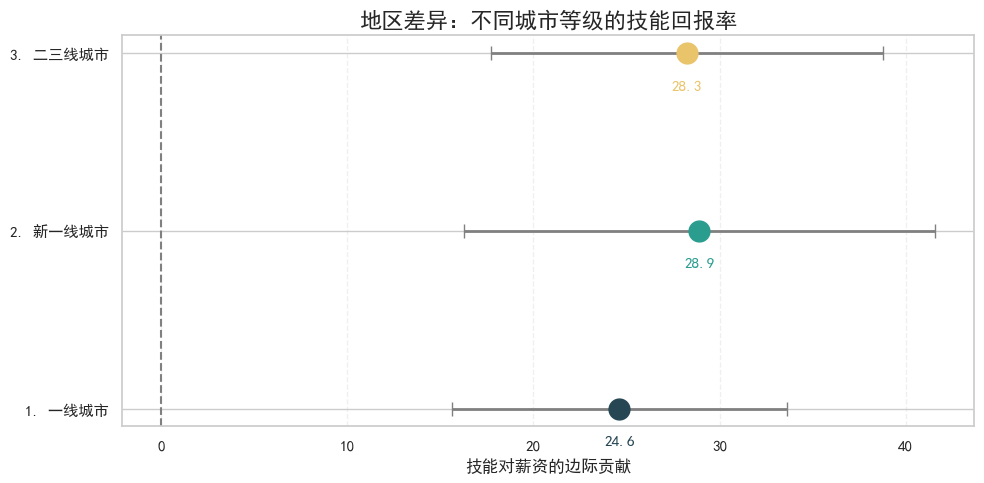

In [13]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 根据地区名称分类为一线、新一线和二三线城市
def classify_city(city_name):
    city_name = str(city_name)
    
    # 一线城市列表
    tier1 = ['北京', '上海', '广州', '深圳']
    # 新一线城市列表
    new_tier1 = ['成都', '杭州', '重庆', '西安', '苏州', '武汉', '南京', '天津', '郑州', '长沙', '东莞', '佛山', '宁波', '青岛', '沈阳']
    
    if any(c in city_name for c in tier1):
        return '1. 一线城市'
    elif any(c in city_name for c in new_tier1):
        return '2. 新一线城市'
    else:
        return '3. 二三线城市'

df['city_tier'] = df['地区'].apply(classify_city)

# 按城市等级进行分层回归
results = []
groups = sorted(df['city_tier'].unique())

for group_name in groups:
    sub_df = df[df['city_tier'] == group_name].copy()
    
    # 样本量要求最少30个观测
    if len(sub_df) < 30:
        continue
        
    X = sub_df[['similarity_score', 'edu_level', 'exp_level']]
    y = sub_df['avg_salary']
    X = sm.add_constant(X)
    
    try:
        model = sm.OLS(y, X).fit()
        coef = model.params['similarity_score']
        p_value = model.pvalues['similarity_score']
        # 提取95%置信区间
        conf = model.conf_int().loc['similarity_score']
        error = coef - conf[0]
        
        results.append({
            'City_Tier': group_name,
            'Coef': coef,
            'P_value': p_value,
            'Error': error,
            'N': len(sub_df)
        })
    except:
        pass

res_city = pd.DataFrame(results)

# 输出地区差异分析结果表
print("------ 地区差异分析 ------")
display_table = res_city[['City_Tier', 'Coef', 'P_value', 'N']].copy()
display_table['Coef'] = display_table['Coef'].apply(lambda x: f"{x:.2f}")
display_table['P_value'] = display_table['P_value'].apply(lambda x: f"{x:.3f}" + ("***" if x<0.01 else "**" if x<0.05 else "*" if x<0.1 else ""))
print(display_table)

# 绘制地区差异对比图
plt.figure(figsize=(10, 5))

# 为不同城市等级配置不同的颜色
colors = ['#264653', '#2a9d8f', '#e9c46a']

for idx, row in res_city.iterrows():
    # 绘制含有置信区间的误差棒
    plt.errorbar(x=row['Coef'], y=row['City_Tier'], xerr=row['Error'], 
                 fmt='o', capsize=5, markersize=15, 
                 color=colors[idx], ecolor='gray', elinewidth=2)
    
    # 在点上标注系数值
    plt.text(row['Coef'], idx - 0.15, f"{row['Coef']:.1f}", 
             va='top', ha='center', fontsize=11, fontweight='bold', color=colors[idx])

plt.title('地区差异：不同城市等级的技能回报率', fontsize=16)
plt.xlabel('技能对薪资的边际贡献', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.axvline(0, color='gray', linestyle='--')

plt.tight_layout()
plt.savefig('./website/data/picture/boss城市等级技能回报率差异.png', dpi=300, bbox_inches='tight')
plt.show()


匹配前薪资差异: 0.91 K
匹配后效应: 9.92 K


C:\Users\xixif\AppData\Local\Temp\ipykernel_41692\2676622289.py:47: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(control['ps_score'], label='控制组 (匹配前)', shade=True, color='gray', alpha=0.3)
C:\Users\xixif\AppData\Local\Temp\ipykernel_41692\2676622289.py:49: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(treated['ps_score'], label='处理组', shade=True, color='blue', alpha=0.3)


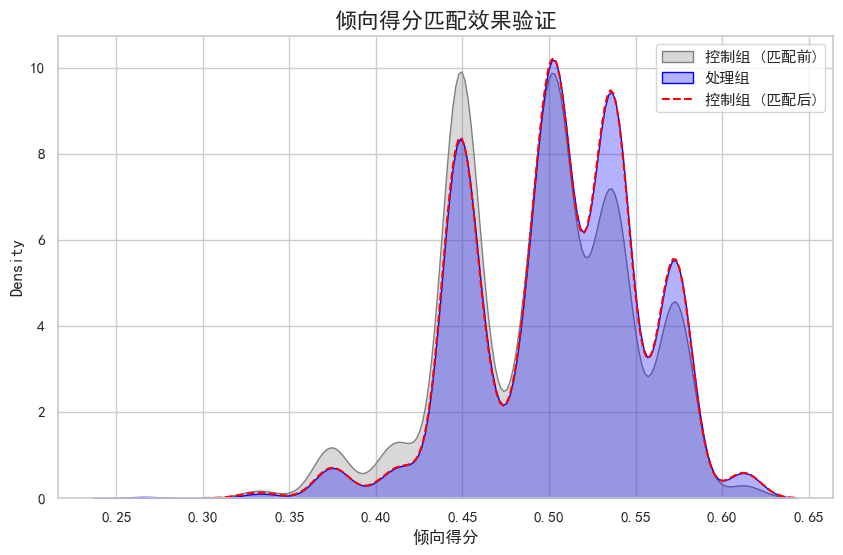

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 以相似度中位数作为分界，创建二元处理变量
threshold = df['similarity_score'].median()
df['treatment'] = (df['similarity_score'] > threshold).astype(int)

# 使用教育水平和经验作为混淆变量
X_covars = df[['edu_level', 'exp_level']] 
y_treatment = df['treatment']

# 计算倾向得分（基于混淆变量预测处理概率）
ps_model = LogisticRegression()
ps_model.fit(X_covars, y_treatment)
df['ps_score'] = ps_model.predict_proba(X_covars)[:, 1]

# 将样本分为处理组和控制组
treated = df[df['treatment'] == 1]
control = df[df['treatment'] == 0]

# 使用最近邻匹配进行倾向得分匹配
nn = NearestNeighbors(n_neighbors=1)
nn.fit(control[['ps_score']])
distances, indices = nn.kneighbors(treated[['ps_score']])

# 获取匹配后的控制组样本
matched_control_indices = control.iloc[indices.flatten()].index
matched_control = df.loc[matched_control_indices]

# 计算平均处理效应（ATE）
mean_diff = treated['avg_salary'].mean() - matched_control['avg_salary'].mean()

print(f"匹配前薪资差异: {treated['avg_salary'].mean() - control['avg_salary'].mean():.2f} K")
print(f"匹配后效应: {mean_diff:.2f} K")

# 绘制匹配前后倾向得分分布对比
plt.figure(figsize=(10, 6))

# 匹配前的控制组分布（灰色）
sns.kdeplot(control['ps_score'], label='控制组 (匹配前)', shade=True, color='gray', alpha=0.3)
# 处理组分布（蓝色）
sns.kdeplot(treated['ps_score'], label='处理组', shade=True, color='blue', alpha=0.3)
# 匹配后的控制组分布（红色虚线）
sns.kdeplot(matched_control['ps_score'], label='控制组 (匹配后)', linestyle='--', color='red')

plt.title('倾向得分匹配效果验证', fontsize=16)
plt.xlabel('倾向得分', fontsize=12)
plt.legend()
plt.savefig('./website/data/picture/boss倾向得分匹配效果验证.png', dpi=300, bbox_inches='tight')
plt.show()


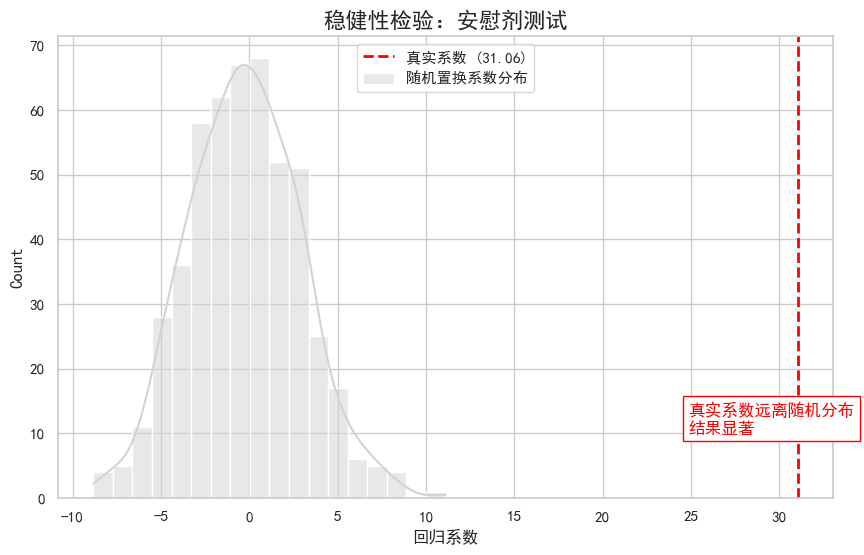

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# 拟合基准模型获取真实系数
base_model = sm.OLS(df['avg_salary'], sm.add_constant(df[['similarity_score', 'edu_level', 'exp_level']])).fit()
true_coef = base_model.params['similarity_score']

# 进行安慰剂测试：随机置换相似度分数
n_simulations = 500
fake_coefs = []

for i in range(n_simulations):
    # 随机打乱相似度分数
    shuffled_score = df['similarity_score'].sample(frac=1, replace=False).values
    
    # 用打乱后的变量进行回归
    temp_df = df.copy()
    temp_df['fake_skill'] = shuffled_score
    
    X_fake = temp_df[['fake_skill', 'edu_level', 'exp_level']]
    X_fake = sm.add_constant(X_fake)
    model_fake = sm.OLS(temp_df['avg_salary'], X_fake).fit()
    
    # 保存系数
    fake_coefs.append(model_fake.params['fake_skill'])

# 绘制安慰剂测试结果图
plt.figure(figsize=(10, 6))

# 展示随机变量的系数分布
sns.histplot(fake_coefs, kde=True, color='lightgray', label='随机置换系数分布')

# 标注真实系数的位置
plt.axvline(true_coef, color='red', linestyle='--', linewidth=2, label=f'真实系数 ({true_coef:.2f})')

plt.title('稳健性检验：安慰剂测试', fontsize=16)
plt.xlabel('回归系数', fontsize=12)
plt.legend()

# 添加说明文字
plt.text(true_coef * 0.8, 10, '真实系数远离随机分布\n结果显著', 
         color='red', fontweight='bold', bbox=dict(facecolor='white', edgecolor='red'))

plt.savefig('./website/data/picture/boss安慰剂测试稳健性检验.png', dpi=300, bbox_inches='tight')
plt.show()


In [16]:
import folium
import pandas as pd

# 搞个经纬度字典，把主要城市的坐标都存进去，后面画地图要用
city_coords = {
    '北京': [39.9042, 116.4074], '上海': [31.2304, 121.4737], '广州': [23.1291, 113.2644],
    '深圳': [22.5431, 114.0579], '杭州': [30.2741, 120.1551], '成都': [30.5728, 104.0668],
    '武汉': [30.5928, 114.3055], '南京': [32.0603, 118.7969], '重庆': [29.5630, 106.5516],
    '西安': [34.3416, 108.9398], '苏州': [31.2989, 120.5853], '天津': [39.0842, 117.2009],
    '长沙': [28.2282, 112.9388], '郑州': [34.7466, 113.6253], '青岛': [36.0671, 120.3826],
    '东莞': [23.0208, 113.7518], '佛山': [23.0215, 113.1214], '宁波': [29.8683, 121.5440],
    '合肥': [31.8206, 117.2272], '沈阳': [41.8057, 123.4315], '济南': [36.6512, 117.1201],
    '无锡': [31.4912, 120.3119], '厦门': [24.4798, 118.0894], '福州': [26.0745, 119.2965],
    '大连': [38.9140, 121.6147], '哈尔滨': [45.8038, 126.5349], '长春': [43.8171, 125.3235],
    '石家庄': [38.0428, 114.5149], '昆明': [24.8801, 102.8329], '南昌': [28.6820, 115.8579],
    '贵阳': [26.6477, 106.6302], '南宁': [22.8170, 108.3665], '太原': [37.8706, 112.5489],
    '海口': [20.0174, 110.3492], '兰州': [36.0611, 103.8343], '西宁': [36.6171, 101.7782],
    '银川': [38.4872, 106.2309], '乌鲁木齐': [43.8256, 87.6168], '呼和浩特': [40.8415, 111.7492],
    '拉萨': [29.6521, 91.1721]
}

# 算一下每个城市的平均工资
city_salary = df.groupby('地区')['avg_salary'].mean().round(1)

# 初始化地图，中心点大概定在中国中间，用OSM地图源比较稳
m = folium.Map(
    location=[35.5, 105],
    zoom_start=5,
    tiles='OpenStreetMap',
    control_scale=True
)

# 挨个把城市画上去
for city_name, salary in city_salary.items():
    # 清洗一下城市名，去掉后缀，不然匹配不到坐标
    clean_name = str(city_name).split('-')[0].split('·')[0].replace('市', '')
    
    if clean_name in city_coords:
        lat, lon = city_coords[clean_name]
        
        # 根据工资高低给个颜色，红的代表钱多
        if salary >= 25: 
            color = '#d62728'
        elif salary >= 15: 
            color = '#ff7f0e'
        elif salary >= 10: 
            color = '#2ca02c'
        else:
            color = '#3186cc'
        
        # 画个圈圈，圈越大工资越高
        folium.CircleMarker(
            location=[lat, lon],
            radius=max(5, salary / 2),
            popup=folium.Popup(
                f"<div style='width:150px; font-family: SimHei;'>"
                f"<b style='font-size:14px'>{city_name}</b><br>"
                f"<span style='color:{color}; font-size:16px; font-weight:bold;'>{salary}K/月</span>"
                f"</div>",
                max_width=200
            ),
            tooltip=f"{city_name}: {salary}K",
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.7,
            weight=2
        ).add_to(m)

# 手搓一个图例，贴在左下角
legend_html = '''
<div style="position: fixed; 
     bottom: 50px; left: 50px; width: 180px; height: 140px; 
     background-color: white; z-index:9999; font-size:14px;
     border:2px solid grey; border-radius: 5px; padding: 10px;
     font-family: SimHei;">
     <p style="margin:0; font-weight:bold;">薪资等级</p>
     <p style="margin:5px 0;"><span style="color:#d62728;">●</span> 高薪 (≥25K)</p>
     <p style="margin:5px 0;"><span style="color:#ff7f0e;">●</span>中高薪 (15-25K)</p>
     <p style="margin:5px 0;"><span style="color:#2ca02c;">●</span> 基础薪 (10-15K)</p>
     <p style="margin:5px 0;"><span style="color:#3186cc;">●</span> 入门薪 (<10K)</p>
</div>
'''
m.get_root().html.add_child(folium.Element(legend_html))

output_path = './website/data/boss城市薪资地图.html'
m.save(output_path)
print(f"地图保存好了: {output_path}")

# 直接显示出来看看
m

地图保存好了: ./website/data/boss城市薪资地图.html


In [17]:
from pyecharts import options as opts
from pyecharts.charts import WordCloud
from pyecharts.globals import SymbolType, CurrentConfig

# 换个稳定的源，不然有时候图出不来
CurrentConfig.ONLINE_HOST = "https://assets.pyecharts.org/assets/"

try:
    # 把词频和权重配对一下
    wordcloud_data = [list(z) for z in zip(final_high_words, [int(s * 10000) for s in final_high_scores])]
    print(f"数据没问题，前几个是: {wordcloud_data[:5]}")
except NameError:
    print("没找到数据，先用假数据顶一下看看效果...")
    wordcloud_data = [
        ('量化策略', 900), ('Python', 850), ('CPA', 800), ('风险管理', 700),
        ('数据挖掘', 650), ('SQL', 600), ('投资回报', 550), ('建模', 500),
        ('算法', 450), ('审计', 400), ('架构', 350), ('运营', 300)
    ]

# 画个钻石形状的词云，看着高级点
c_diamond = (
    WordCloud(init_opts=opts.InitOpts(width="1000px", height="600px", bg_color="white", page_title="高薪技能词云"))
    .add(
        series_name="核心技能权重",
        data_pair=wordcloud_data,
        word_size_range=[20, 80], 
        shape=SymbolType.DIAMOND,
        textstyle_opts=opts.TextStyleOpts(
            font_family="Microsoft YaHei", 
            font_weight="bold"
        )
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(
            title="高薪岗位“硬核技能”雷达",
            subtitle="词云越大含金量越高",
            pos_left="center",
            title_textstyle_opts=opts.TextStyleOpts(font_size=20)
        ),
        tooltip_opts=opts.TooltipOpts(is_show=True),
    )
)

output_file = "./website/data/diamond_chart_fixed.html"
c_diamond.render(output_file)

print(f"词云图搞定了，去看看：{output_file}")

数据没问题，前几个是: [['基金经理', 66], ['股票', 21], ['私募基金', 19], ['数学', 18], ['基金从业资格', 18]]
词云图搞定了，去看看：./website/data/diamond_chart_fixed.html


In [18]:
from pyecharts import options as opts
from pyecharts.charts import Sankey
import pandas as pd

# 把薪资分个层，不然太散了不好画
def salary_level(s):
    if s < 10: return '低薪区 (<10K)'
    elif s < 20: return '中薪区 (10-20K)'
    elif s < 35: return '高薪区 (20-35K)'
    else: return '超高薪区 (>35K)'

df['salary_grade'] = df['avg_salary'].apply(salary_level)

# 构造数据流向：学历 -> 经验 -> 薪资
# 第一段：学历流向经验
flow1 = df.groupby(['学历', '经验']).size().reset_index(name='value')
flow1.columns = ['source', 'target', 'value']

# 第二段：经验流向薪资
flow2 = df.groupby(['经验', 'salary_grade']).size().reset_index(name='value')
flow2.columns = ['source', 'target', 'value']

# 拼在一起
links = pd.concat([flow1, flow2], axis=0).to_dict('records')

# 把所有用到的节点都列出来
all_nodes = list(df['学历'].unique()) + list(df['经验'].unique()) + list(df['salary_grade'].unique())
nodes = [{"name": name} for name in list(set(all_nodes))]

c_sankey = (
    Sankey(init_opts=opts.InitOpts(width="1000px", height="600px", theme="light"))
    .add(
        "人才流动",
        nodes,
        links,
        linestyle_opt=opts.LineStyleOpts(opacity=0.3, curve=0.5, color="source"),
        label_opts=opts.LabelOpts(position="right", font_size=12),
        node_gap=20,
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="商科人才职业发展路径桑基图", subtitle="流向：学历 -> 经验 -> 薪资分层"),
        tooltip_opts=opts.TooltipOpts(trigger="item", trigger_on="mousemove")
    )
)

c_sankey.render("./website/data/sankey_chart.html")

print("桑基图保存好了：sankey_chart.html")

桑基图保存好了：sankey_chart.html


In [19]:
from pyecharts.charts import Scatter, Line
from pyecharts import options as opts
from pyecharts.globals import CurrentConfig
from pyecharts.commons.utils import JsCode
import numpy as np

CurrentConfig.ONLINE_HOST = "https://assets.pyecharts.org/assets/"

# 检查一下有没有含金量这一列，没有的话就造一点假数据兜底，防止报错
_df = df.copy()
if 'similarity_score' not in _df.columns:
    if 'similarity_scores' in globals() and len(similarity_scores) == len(_df):
        _df['similarity_score'] = similarity_scores
    else:
        _df['similarity_score'] = np.linspace(0.2, 0.8, len(_df))

# 抽样500个点来画图，不然点太多浏览器会卡死
plot_data = _df.sample(n=min(500, len(_df)), random_state=42)

x_val = plot_data['similarity_score'].round(3).tolist()
y_val = plot_data['avg_salary'].round(1).tolist()

# 鼠标放上去显示的提示信息
try:
    tooltips = (plot_data['职位'] + " (" + plot_data['公司'] + ")").tolist()
except Exception:
    tooltips = ["职位信息"] * len(x_val)

y_payload = [[y, tip] for y, tip in zip(y_val, tooltips)]

# 算个回归线，看看趋势 (y = kx + b)
z = np.polyfit(x_val, y_val, 1)
poly = np.poly1d(z)
x_line = np.linspace(0, 1, 100)
y_line = poly(x_line)

scatter = (
    Scatter(init_opts=opts.InitOpts(width="1000px", height="600px", bg_color="white", page_title="微观验证"))
    .add_xaxis(xaxis_data=x_val)
    .add_yaxis(
        series_name="岗位样本",
        y_axis=y_payload,
        label_opts=opts.LabelOpts(is_show=False),
        symbol_size=8,
        itemstyle_opts=opts.ItemStyleOpts(color="rgba(70, 130, 180, 0.6)")
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(
            title="微观证据：高含金量描述如何驱动高薪？",
            subtitle="散点：具体岗位 | 红线：回归趋势",
            pos_left="center",
            pos_top="2%"
        ),
        legend_opts=opts.LegendOpts(
            pos_top="10%",
            pos_left="center",
            orient="horizontal",
            item_gap=12
        ),
        xaxis_opts=opts.AxisOpts(
            name="JD含金量(0-1)", type_="value", min_=0, max_=1,
            splitline_opts=opts.SplitLineOpts(is_show=True)
        ),
        yaxis_opts=opts.AxisOpts(
            name="月薪(K)", type_="value",
            splitline_opts=opts.SplitLineOpts(is_show=True)
        ),
        tooltip_opts=opts.TooltipOpts(
            formatter=JsCode(
                "function (params) {" \
                "var x = params.value[0];" \
                "var y = params.value[1];" \
                "var info = params.value[2] || '';" \
                "return '含金量: ' + x + '<br/>薪资: ' + y + 'K<br/>' + info;" \
                "}"
            )
        )
    )
)

# 把回归线叠加上去
line = (
    Line()
    .add_xaxis(xaxis_data=x_line.tolist())
    .add_yaxis(
        series_name="趋势线",
        y_axis=y_line.tolist(),
        symbol="none",
        linestyle_opts=opts.LineStyleOpts(width=4, color="#d62728"),
        label_opts=opts.LabelOpts(is_show=False)
    )
)

c_scatter = scatter.overlap(line)

file_name_2 = "./website/data/scatter_regression.html"
c_scatter.render(file_name_2)
print(f"交互散点图生成了：{file_name_2}")
print(f"回归方程: y = {z[0]:.2f}x + {z[1]:.2f}")

c_scatter.render_notebook()

交互散点图生成了：./website/data/scatter_regression.html
回归方程: y = 37.49x + 18.74


In [20]:
from pyecharts import options as opts
from pyecharts.charts import Radar
from pyecharts.globals import CurrentConfig
import numpy as np

CurrentConfig.ONLINE_HOST = "https://assets.pyecharts.org/assets/"

# 准备数据，只要这几列
safe_cols = ['edu_level', 'exp_level', 'similarity_score', 'avg_salary']
clean_df = df[safe_cols].dropna()
if clean_df.empty:
    raise ValueError("数据为空，检查一下前面的步骤")

# 按薪资分个高低组
q1 = clean_df['avg_salary'].quantile(0.25)
q3 = clean_df['avg_salary'].quantile(0.75)

low_df = clean_df[clean_df['avg_salary'] <= q1]
high_df = clean_df[clean_df['avg_salary'] >= q3]

# 万一分组是空的，就拿最小/最大的几个数凑合一下，防止报错
def ensure_group(group, fallback_fn):
    if group.empty:
        return fallback_fn()
    return group

low_df = ensure_group(low_df, lambda: clean_df.nsmallest(max(1, int(len(clean_df) * 0.25)), 'avg_salary'))
high_df = ensure_group(high_df, lambda: clean_df.nlargest(max(1, int(len(clean_df) * 0.25)), 'avg_salary'))

low_group = low_df[['edu_level', 'exp_level', 'similarity_score']].mean()
high_group = high_df[['edu_level', 'exp_level', 'similarity_score']].mean()

# 稍微缩放一下数据，不然雷达图不好看
scale_sim = 5
edu_cap, exp_cap, sim_cap = 5, 12, 5
def clamp(v, cap):
    return max(0, min(round(v, 2), cap))

data_low = [
    clamp(low_group['edu_level'], edu_cap),
    clamp(low_group['exp_level'], exp_cap),
    clamp(low_group['similarity_score'] * scale_sim, sim_cap)
]

data_high = [
    clamp(high_group['edu_level'], edu_cap),
    clamp(high_group['exp_level'], exp_cap),
    clamp(high_group['similarity_score'] * scale_sim, sim_cap)
]

c_radar = (
    Radar(init_opts=opts.InitOpts(width="900px", height="600px", bg_color="white", page_title="人才画像对比"))
    .add_schema(
        schema=[
            opts.RadarIndicatorItem(name="学历背景 (Education)", max_=edu_cap),
            opts.RadarIndicatorItem(name="工作经验 (Experience)", max_=exp_cap),
            opts.RadarIndicatorItem(name="技能含金量 (Skill Score x5)", max_=sim_cap),
        ],
        splitarea_opt=opts.SplitAreaOpts(is_show=True, areastyle_opts=opts.AreaStyleOpts(opacity=1)),
        textstyle_opts=opts.TextStyleOpts(color="#333"),
    )
    .add(
        series_name="低薪组 (Bottom 25%)",
        data=[data_low],
        color="#4575b4",
        areastyle_opts=opts.AreaStyleOpts(opacity=0.3, color="#4575b4"),
    )
    .add(
        series_name="高薪组 (Top 25%)",
        data=[data_high],
        color="#d73027",
        areastyle_opts=opts.AreaStyleOpts(opacity=0.3, color="#d73027"),
    )
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(
        title_opts=opts.TitleOpts(title="高薪 vs 低薪：人才资本多维画像对比", pos_left="center"),
        legend_opts=opts.LegendOpts(pos_bottom="5%")
    )
)

file_radar = "./website/data/radar_profile.html"
c_radar.render(file_radar)
print(f"雷达图生成完毕：{file_radar}")
print(f"低薪组数据: {data_low}, 高薪组数据: {data_high}")

c_radar.render_notebook()

雷达图生成完毕：./website/data/radar_profile.html
低薪组数据: [np.float64(1.7), np.float64(0.94), np.float64(0.14)], 高薪组数据: [np.float64(2.84), np.float64(4.56), np.float64(0.21)]
